# Project: Investigate a Dataset of Medical Appointment No Shows

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
A person makes a doctor appointment, receives all the instructions and end up not showing up? This raises lots of questions into the why of no show. 
The following investigation include dataset collected information from 100k medical appointments in Brazil and is focused to answer the question into the reasons of patient not showing up for the medical appointment. The dataset include a number of characteristics about the patient;
       <Ol>
            <li>PatientId - Identification of a patient </li>
            <li>AppointmentID - Identification of each appointment</li>
            <li>Gender - Male or Female</li>
            <li>DataMarcacaoConsulta - The day of the actuall appointment</li>
            <li>DataAgendamento - The day someone registered the appointment</li>
            <li>Age - How old is the patient </li>
            <li>Neighbourhood - Where the appointment takes place</li>
            <li>Scholarship</li>
            <li>Hipertension</li>
            <li>Diabetes</li>
            <li>Alcoholism</li>
            <li>Handcap</li>
            <li>SMS_received - 1 or more messages sent to the patient</li>
            <li>No-show</li>    
       </Ol>
In the report, the following questions will be answered in accordance to the dataset:
<ul>
    <li> How does the gender affect the appointment show up? </li>
    <li> Are the patients on scholarship still adhearing to the appointment dates? </li>
    <li> Do age have a relation with the patient show up for the appointment? </li>
    <li> What's the relation of age to student with scholarship? </li>
</ul>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling
### General Properties

In [2]:
#Gathering of data and print out a few lines.
df = pd.read_csv("https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv")
df.head()

PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0             0      No  
2         0           0        0             0      No  
3         0           0        0             0      No  
4         1           0        0             0      No

In [3]:
#Inspecting data
df.shape

(110527, 14)

In [4]:
# Checking for missing values in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
#Check for any duplicated values (False if none)
df.duplicated().any() 

False

In [6]:
#Getting a description of dataset
df.describe() 

PatientId  AppointmentID            Age    Scholarship  \
count  1.105270e+05   1.105270e+05  110527.000000  110527.000000   
mean   1.474963e+14   5.675305e+06      37.088874       0.098266   
std    2.560949e+14   7.129575e+04      23.110205       0.297675   
min    3.921784e+04   5.030230e+06      -1.000000       0.000000   
25%    4.172614e+12   5.640286e+06      18.000000       0.000000   
50%    3.173184e+13   5.680573e+06      37.000000       0.000000   
75%    9.439172e+13   5.725524e+06      55.000000       0.000000   
max    9.999816e+14   5.790484e+06     115.000000       1.000000   

        Hipertension       Diabetes     Alcoholism        Handcap  \
count  110527.000000  110527.000000  110527.000000  110527.000000   
mean        0.197246       0.071865       0.030400       0.022248   
std         0.397921       0.258265       0.171686       0.161543   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       4.000000   

        SMS_received  
count  110527.000000  
mean        0.321026  
std         0.466873  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         1.000000  
max         1.000000

In [7]:
#Creating a function to find age value = negative patient age
def neg_age_equation():
    neg=df.query('Age < 0')
    return neg
#Age values in the dataset with negative patient age
neg_age_equation().Age.count()

1

### Data inspection  
The dataset comprises of 110527 rows and 14 columns.<br>
No missing data in all the 14 columns and duplicated data thus, no data to be dropped as Nan.<br>
Removal of data from the age column with negative age value resulting in a minimum of zero.<br>
Columns to be removed: PatientId, AppointmentID, ScheduledDay, AppointmentDay, Neighbourhood, Hipertension, Diabetes, Alcoholism, Handcap and SMS_received thus, the number of columns to remain should be 4 .<br>
Renaming of the No-show column to No_show.
Added a new column of the representing the show up column in int data type.

In [8]:
#Delete rows where age of patients negative
index_names=neg_age_equation().index
df.drop(index_names, inplace= True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110526 non-null  float64
 1   AppointmentID   110526 non-null  int64  
 2   Gender          110526 non-null  object 
 3   ScheduledDay    110526 non-null  object 
 4   AppointmentDay  110526 non-null  object 
 5   Age             110526 non-null  int64  
 6   Neighbourhood   110526 non-null  object 
 7   Scholarship     110526 non-null  int64  
 8   Hipertension    110526 non-null  int64  
 9   Diabetes        110526 non-null  int64  
 10  Alcoholism      110526 non-null  int64  
 11  Handcap         110526 non-null  int64  
 12  SMS_received    110526 non-null  int64  
 13  No-show         110526 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 12.6+ MB


In [9]:
##Ensuring that all the negative age value are dropped by inspecting minimum age value
df.Age.describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

Removal of data from the age column with zero age value resulting in a minimum of zero.

In [10]:
# Creating a function to find age value = 0
def zero_age_equation():
    data=df.query('Age == 0')
    return data
#Age values in the dataset with zero patient age
zero_age_equation().Age.count()

3539

In [11]:
#Delete rows where age of patients negative
index_names = zero_age_equation().index
df.drop(index_names, inplace= True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106987 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       106987 non-null  float64
 1   AppointmentID   106987 non-null  int64  
 2   Gender          106987 non-null  object 
 3   ScheduledDay    106987 non-null  object 
 4   AppointmentDay  106987 non-null  object 
 5   Age             106987 non-null  int64  
 6   Neighbourhood   106987 non-null  object 
 7   Scholarship     106987 non-null  int64  
 8   Hipertension    106987 non-null  int64  
 9   Diabetes        106987 non-null  int64  
 10  Alcoholism      106987 non-null  int64  
 11  Handcap         106987 non-null  int64  
 12  SMS_received    106987 non-null  int64  
 13  No-show         106987 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 12.2+ MB


In [12]:
#Ensuring that all the zero age value are dropped by inspecting minimum age value
df.Age.describe()

count    106987.000000
mean         38.316085
std          22.466214
min           1.000000
25%          19.000000
50%          38.000000
75%          56.000000
max         115.000000
Name: Age, dtype: float64

In [13]:
#cleaning of the data by dropping some of the columns no to be used in the analysis.
df.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay','Neighbourhood','Hipertension', 'Diabetes', 'Alcoholism','Handcap', 'SMS_received'], axis=1, inplace=True)
df.head()

Gender  Age  Scholarship No-show
0      F   62            0      No
1      M   56            0      No
2      F   62            0      No
3      F    8            0      No
4      F   56            0      No

In [14]:
#Review of the remaining dataset for number of rows and columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106987 entries, 0 to 110526
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Gender       106987 non-null  object
 1   Age          106987 non-null  int64 
 2   Scholarship  106987 non-null  int64 
 3   No-show      106987 non-null  object
dtypes: int64(2), object(2)
memory usage: 4.1+ MB


In [15]:
#Review of the remaining dataset for any blank value(False if none)
df.isnull().any()

Gender         False
Age            False
Scholarship    False
No-show        False
dtype: bool

In [16]:
# Renaming of the No-show column to No_show 
df.rename(columns={"No-show": "No_show"}, inplace=True)
df

Gender  Age  Scholarship No_show
0           F   62            0      No
1           M   56            0      No
2           F   62            0      No
3           F    8            0      No
4           F   56            0      No
...       ...  ...          ...     ...
110522      F   56            0      No
110523      F   51            0      No
110524      F   21            0      No
110525      F   38            0      No
110526      F   54            0      No

[106987 rows x 4 columns]

In [17]:
df.describe()

Age    Scholarship
count  106987.000000  106987.000000
mean       38.316085       0.101031
std        22.466214       0.301371
min         1.000000       0.000000
25%        19.000000       0.000000
50%        38.000000       0.000000
75%        56.000000       0.000000
max       115.000000       1.000000

In [18]:
# converegion of No_show object into int
df["Numeric_show"] = (df['No_show']=='Yes').astype(int) 
df.head(10)

Gender  Age  Scholarship No_show  Numeric_show
0      F   62            0      No             0
1      M   56            0      No             0
2      F   62            0      No             0
3      F    8            0      No             0
4      F   56            0      No             0
5      F   76            0      No             0
6      F   23            0     Yes             1
7      F   39            0     Yes             1
8      F   21            0      No             0
9      F   19            0      No             0

In [19]:
#Remaining numbers of rows and columns
df.shape

(106987, 5)

### Data Cleaning
Removed negative age and zero value that gives an age minimum value of negative and zero resulting to  106,987rows.<br>
Dropped ten Columns thus the number of columns that remained were 4.<br>
Renamed the No-show column to No_show.<br>
New column representing show_up in int Dada type<br>
The dataset now comprises of 106987 rows and 5 columns.



<a id='eda'></a>
## Exploratory Data Analysis

In [20]:
for data in df[['Scholarship', 'Gender', 'No_show']]:
    print(df[data].value_counts())

0    96178
1    10809
Name: Scholarship, dtype: int64
F    70118
M    36869
Name: Gender, dtype: int64
No     85307
Yes    21680
Name: No_show, dtype: int64


#### How many show up and no show were there?

No_show
No     85307
Yes    21680

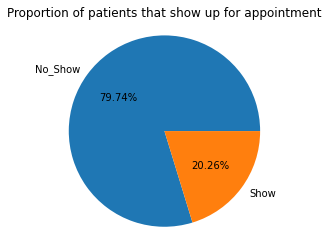

In [21]:
# visualization of Proportion of patient that show up for appointment
#Defining function for plotting pie charts
def pie_plot(value,labels):
    pie=plt.pie(x=value,labels = labels, radius=1.1,autopct= '%1.2f%%')
    rtf = pd.DataFrame(value)
    return pie,rtf
plt.title('Proportion of patients that show up for appointment')
value=df['No_show'].value_counts()
labels = ['No_Show', 'Show']
pie, rtf= pie_plot(value,labels);
rtf

The dataset comprises of:<br>
20.26% patient show up -21,680 patients <br>
79.74% patient no show - 85,307 patients 

### Research Question 1 : How does the gender affect the appointment show up?

#### How many females and males are there in the data set?

Gender
F   70118
M   36869

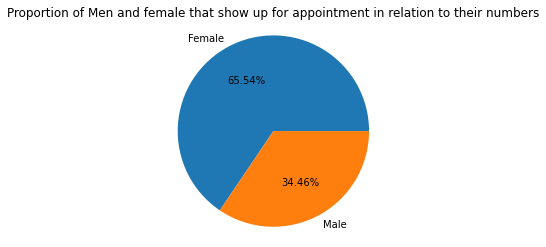

In [22]:
# visualization of number of females and males are there in the data set
plt.title('Proportion of Men and female that show up for appointment in relation to their numbers')
labels = ['Female', 'Male']
value=df['Gender'].value_counts()
pie, rtf= pie_plot(value,labels);
rtf

The dataset comprises of:<br>
70,118  females - 65.54% of the total number of patients<br>
36,869 males - 34.46% of the total number of patients.


**Comparison of male and female numbers**

In [23]:
# Creating a function to find gender count
def count_equation(data):
    count=data.count()['Gender']
    return count

In [24]:
# defining female and male in the data
female=df.query('Gender == "F"')
male=df.query('Gender == "M"')

In [25]:
# difference of male and female numbers
count_equation(female)-count_equation(male)

33249

There are 33,249 more females than males thus, females tend to take more care of their health than males.

#### How many females and males in the data set in accordance to show up?

In [26]:
# Defining of patient who show up and those that don't
df_show=df.query('Numeric_show == 1')
df_noshow=df.query('Numeric_show == 0')

In [27]:
# Ensuring the number of patient that show up and those that don't add-up to number of patients in the data. Should be True if correct.
num_patients = df.shape[0]
num_patients == count_equation(df_show) + count_equation(df_noshow)

True

In [28]:
#Number of male and female that show up for appointment in relation of total show
df_show.groupby('Gender')["No_show"].value_counts()

Gender  No_show
F       Yes        14275
M       Yes         7405
Name: No_show, dtype: int64

No_show
Gender         
F         14275
M          7405

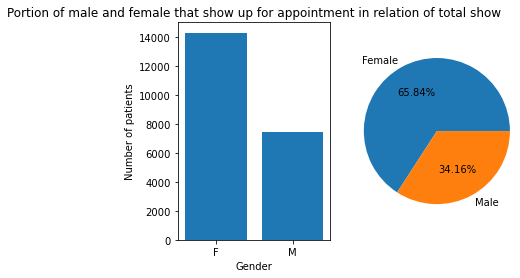

In [29]:
# visualization of Number of male and female that show up for appointment in relation of total show
#defing combine equation
def combine_equation(data):
    fig, (ax1, ax2)=plt.subplots(1,2)
    x=('F','M')
    ax1.set_ylabel('Number of patients');
    ax1.set_xlabel('Gender');
    ax1.set_title('Portion of male and female that show up for appointment in relation of total show')
    labels = ['Female', 'Male']
    combine=((ax1.bar(x,height=data.groupby('Gender')["No_show"].count(), width=0.8)),(ax2.pie(data.groupby('Gender')["No_show"].count(), labels = labels, radius=1.2, autopct= '%1.2f%%')))
    rtf=pd.DataFrame(data.groupby('Gender')["No_show"].count())
    return combine, rtf
data= df_show
combine, rtf = combine_equation(data)
rtf 

Out of the 70,118 females, only 14,275 show up for the appointment which accounts to 65.84% of the total show.<br>
Out of the 36,869 males, only 7,405 show up for the appointment which accounts to 34.16% of the total show.

**How many female and male don't show up for appointment?**

In [30]:
#Number of male and female that no show for appointment in relation of total show
df_noshow.groupby('Gender')["No_show"].value_counts()

Gender  No_show
F       No         55843
M       No         29464
Name: No_show, dtype: int64

No_show
Gender         
F         55843
M         29464

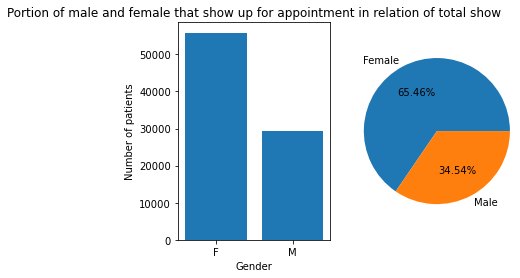

In [31]:
# visualization of Number of male and female that no show for appointment in relation of total show
data= df_noshow
combine, rtf = combine_equation(data)
rtf 

Out of the 70,118 females, 55,843 don't show up for the appointment which accounts to 65.46% of the total no show.<br>
Out of the 36,869 males, 29,464 don't show up for the appointment which accounts to 34.54% of the total no show.

**Female turn out for the appointment**

In [32]:
# Exploring how many female show up and those that don't show up for appointment
female["Numeric_show"].value_counts()

0    55843
1    14275
Name: Numeric_show, dtype: int64

In [33]:
# Ensuring the number of female that show up and female that didn't show up add-up to number of females in the data
count_equation(female) == female["Numeric_show"].count()

True

Numeric_show
0         55843
1         14275

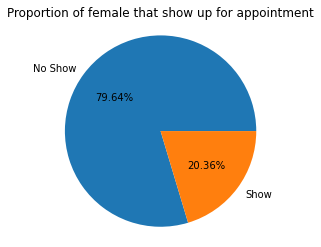

In [34]:
# visualization of Proportion of female that show up for appointment
plt.title('Proportion of female that show up for appointment');
value = female["Numeric_show"].value_counts()
labels = ['No Show', 'Show']
pie, rtf= pie_plot(value,labels);
rtf

**Exploring the data for the females that show up**<br>
From the data, 14,275 female showed for their appointment which account to approximately 20.36%, while 55,843 didn't show up for the appointment which account to approximately 79.64% out of 70,118 females.

**Male turn out for the appointment**

In [35]:
# Exploring the number of male that show up for appointment and those that didn't show up for appointment
male["Numeric_show"].value_counts()


0    29464
1     7405
Name: Numeric_show, dtype: int64

In [36]:
# Ensuring the number of male that show up and male that didn't show up add-up to number of males in the data
count_equation(male)  == male["Numeric_show"].count()

True

Numeric_show
0         29464
1          7405

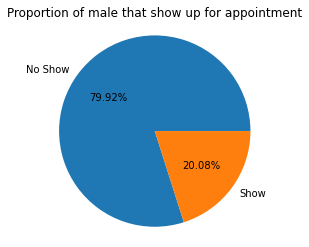

In [37]:
# visualization of Proportion of male that show up for appointment
value = male["Numeric_show"].value_counts()
labels = ['No Show', 'Show']
plt.title('Proportion of male that show up for appointment');
pie, rtf= pie_plot(value,labels);
rtf

**Exploring the data for the males that show up**<br>
From the data, 7,405 male showed for their appointment which account to approximately 20.08%, while 29,464 didn't show up for the appointment which account to approximately 79.92% out of 36,869 females.

#### How many women show up/ no show for their appointment more than men in comparison to their total numbers of show?

In [38]:
#Difference between male and female show up
(female["Numeric_show"].value_counts())-(male["Numeric_show"].value_counts())

0    26379
1     6870
Name: Numeric_show, dtype: int64

In [39]:
# Ensuring the number of female that show up and male that show up add-up to number of patient that show up in the data
(df["Numeric_show"].value_counts()) == (female["Numeric_show"].value_counts())+(male["Numeric_show"].value_counts())

0    True
1    True
Name: Numeric_show, dtype: bool

From the data,there are 6,870 more females than males that show up for appointment and 26,379 more females than males that don't show up for appointment.

**Comparison of female show mean and male show in contrast to the mean**

In [40]:
#mean for male that show for appointment.
male_mean=male["Numeric_show"].mean()
male_mean

0.20084623938810384

In [41]:
#mean for female that show for appointment.
female_mean=female["Numeric_show"].mean()
female_mean

0.20358538463732564

In [42]:
#comparison of the Men and female that show up for appointment according to show up proportion.
female_mean > male_mean

True

In [43]:
#Comparison of the Men and female that show up for appointment according to show patient proportion.
female_mean - male_mean

0.0027391452492218082

In [44]:
round((female_mean - male_mean)*count_equation(df_show))

59

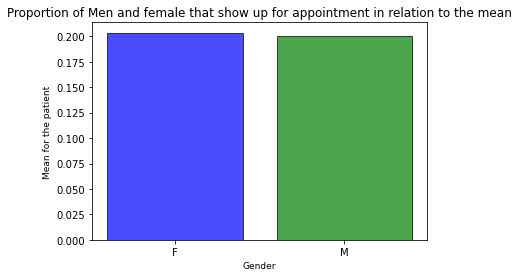

In [45]:
height = [female_mean, male_mean]
x=('F','M')
color = ("blue","green")
plt.bar(x,height=height, edgecolor='black', color=color, alpha=.7 );
plt.title('Proportion of Men and female that show up for appointment in relation to the mean', fontsize=12);
mean_bar=plt.ylabel('Mean for the patient', fontsize=9)
plt.xlabel('Gender', fontsize=9);

In relation to the mean, there are approximately 0.003 (59) more female show up more than male in contrast to the total number of show.

### Research Question 2: Are the patients on scholarship still adhearing to the appointment dates?

Scholarship
0        96178
1        10809

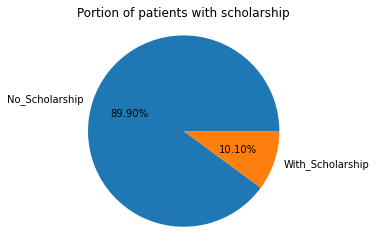

In [46]:
# Visualization Number of patients with scholarship
labels = ['No_Scholarship', 'With_Scholarship']
value=df['Scholarship'].value_counts()
plt.title('Portion of patients with scholarship')
pie, rtf= pie_plot(value,labels);
rtf

There are 10,809 (89.90%) patients with scholarships and 96,178 (10.10%) patients without scholarships.

In [47]:
#Description of the data on Scholarship
With_Scholarship = df.Scholarship ==True
No_Scholarship = df.Scholarship == False

In [48]:
#Patient with scholarship that show up for the appointment
Scholarship_show=df_show[With_Scholarship].count().Scholarship

<ipython-input-48-8fcabbe4a87d>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Scholarship_show=df_show[With_Scholarship].count().Scholarship


In [49]:
#Patient with scholarship that don't show up for the appointment
Scholarship_noshow=df_noshow[With_Scholarship].count().Scholarship

<ipython-input-49-79ba69ae4196>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Scholarship_noshow=df_noshow[With_Scholarship].count().Scholarship


0
0  2571
1  8238

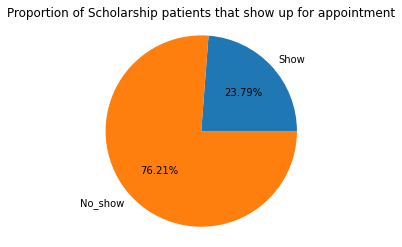

In [50]:
#Visualization of the patients on scholarship adhearing to the appointment dates
value = [Scholarship_show, Scholarship_noshow]
labels = ['Show', 'No_show']
plt.title('Proportion of Scholarship patients that show up for appointment')
pie, rtf= pie_plot(value,labels);
rtf

23.79% (2,571) students with scholarship show up for appointment will 76.21% (8,238) of the students with scholarship Don's show up.

**Comparison of patient with Scholarship and those without turnout for appointment**

In [51]:
#Patient with no scholarship turn up for the appointment
no_scholarship=df[No_Scholarship].groupby('Numeric_show')['Scholarship'].count()
no_scholarship

Numeric_show
0    77069
1    19109
Name: Scholarship, dtype: int64

In [52]:
no_scholarship/df[No_Scholarship].count().Scholarship

Numeric_show
0    0.801316
1    0.198684
Name: Scholarship, dtype: float64

19,109 patients with no scholarship show up for appointment(19.86%) while 77,069 of the patients with no scholarship Don't show up out of the 96,178 patients(80.13%).

In [53]:
#Patient with  scholarship turn up for the appointment
scholarship=df[With_Scholarship].groupby('Numeric_show')['Scholarship'].count()
scholarship

Numeric_show
0    8238
1    2571
Name: Scholarship, dtype: int64

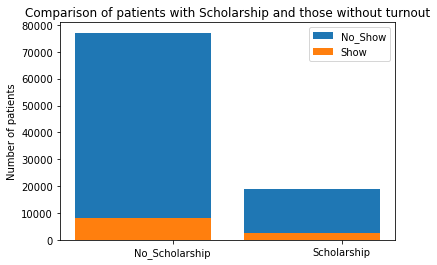

In [54]:
#Visualization of patient with Scholarship and those without turnout for appointment
subject=['Numeric_show','Scholarship']
index=np.arange(len(subject))
bar_width=0.35
fig, ax=plt.subplots()

ax.bar(index-bar_width/2, no_scholarship, label="No_Scholarship")
ax.bar(index-bar_width/2, scholarship, label="Scholarship")

#insert x axis label
label= ['No_Scholarship','Scholarship']
ax.set_xticks(index)
ax.set_xticklabels(label)

#insert y axis label
ax.set_ylabel("Number of patients")

#insert title label
ax.set_title("Comparison of patients with Scholarship and those without turnout")

#insert legend
labels= ['No_Show','Show']
ax.legend(labels);

In [55]:
#Mean for the patient with Scholarship and those without turnout for appointment
scholarship_mean=df[With_Scholarship].mean().Numeric_show
noscholarship_mean=df[No_Scholarship].mean().Numeric_show

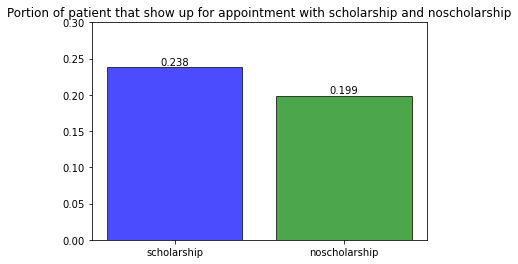

In [56]:
#Visualization of patient with Scholarship and those without turnout for appointment
patients=np.arange(0,0.35,0.05)
height = [scholarship_mean, noscholarship_mean]
x=('scholarship','noscholarship')
y=[round(scholarship_mean,3), round(noscholarship_mean,3)]
color = ("blue","green")
plt.bar(x,height=height, edgecolor='black', color=color, alpha=.7 );
plt.yticks(patients)
plt.title('Portion of patient that show up for appointment with scholarship and noscholarship');

for i in range(len(x)):
    plt.text(i, y[i], y[i], ha='center', va='bottom')

Patients with Scholarship show up for appointment more than those without scholarship; 0.238 show up for Patients with Scholarship and 0.199 show up for Patients without Scholarship.

### Research Question 3: Do age have a relation with the patient show up for the appointment?

In [57]:
# View the 0, 25%, 50%, 75%, max Age values using Pandas describe
df.describe().Age

count    106987.000000
mean         38.316085
std          22.466214
min           1.000000
25%          19.000000
50%          38.000000
75%          56.000000
max         115.000000
Name: Age, dtype: float64

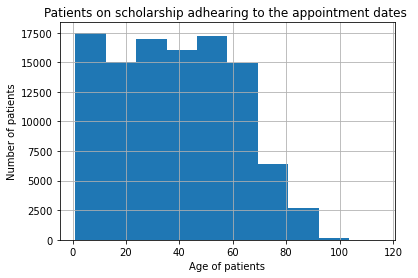

In [58]:
#Visualization of the patients on scholarship adhearing to the appointment dates
plt.title('Patients on scholarship adhearing to the appointment dates ')
plt.ylabel('Number of patients');
plt.xlabel('Age of patients');

def hist_equation(data):
    hist=data.hist()
    rtf=pd.DataFrame(data)
    return rtf, hist
data = df.Age
hist, rtf = hist_equation(data)
rtf;

In [60]:
#Ages of those in scholarship 
# Bin edges that will be used to "cut" the data into groups
bin_edges = [0.00, 17.0, 35.0, 60.0, 115.0]

In [61]:
# Labels for the four Age groups level
bin_names = ['Underage', 'Teen', 'Adult', 'Old']

In [62]:
# Creates Ages groups level column
df['Age_groups'] = pd.cut(df['Age'], bin_edges, labels=bin_names, right=True)

# Checks for successful creation of this column
df.head(5)


Gender  Age  Scholarship No_show  Numeric_show Age_groups
0      F   62            0      No             0        Old
1      M   56            0      No             0      Adult
2      F   62            0      No             0        Old
3      F    8            0      No             0   Underage
4      F   56            0      No             0      Adult

In [63]:
#Checking the data after creating the Age_groups column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106987 entries, 0 to 110526
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   Gender        106987 non-null  object  
 1   Age           106987 non-null  int64   
 2   Scholarship   106987 non-null  int64   
 3   No_show       106987 non-null  object  
 4   Numeric_show  106987 non-null  int32   
 5   Age_groups    106987 non-null  category
dtypes: category(1), int32(1), int64(2), object(2)
memory usage: 8.6+ MB


In [64]:
df.Age_groups.unique()

['Old', 'Adult', 'Underage', 'Teen']
Categories (4, object): ['Underage' < 'Teen' < 'Adult' < 'Old']

In [65]:
Ages=df.Age_groups.value_counts()
Ages

Adult       37761
Teen        25624
Underage    23840
Old         19762
Name: Age_groups, dtype: int64

In [66]:
Ages/df.Age.count()

Adult       0.352949
Teen        0.239506
Underage    0.222831
Old         0.184714
Name: Age_groups, dtype: float64

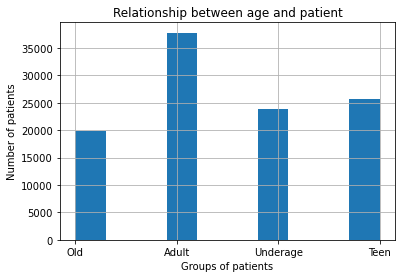

In [67]:
#Visualization of Age_groups data
plt.title('Relationship between age and patient')
plt.ylabel('Number of patients');
plt.xlabel('Groups of patients');
data = df.Age_groups
hist, rtf = hist_equation(data)
rtf;

Most of the patients are in their adult age (37,761).<br>
The Underage (23,840) and teen (25,624) typically makes appointments while the old make appointments the least (19,762).<br>
#### Whats the relation of patient show up with the age?


In [68]:
# Relation of age with appointment showing up
df_show=df.query('Numeric_show == 1')
df_show_age=df_show.groupby('Age_groups')['Numeric_show'].count()
df_show_age/Ages.sort_values()

Underage    0.224748
Teen        0.238175
Adult       0.191017
Old         0.152110
dtype: float64

Numeric_show
Age_groups              
Old                 3006
Underage            5358
Teen                6103
Adult               7213

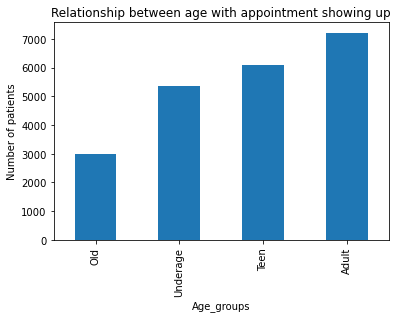

In [69]:
# visualization of Relation of age with appointment showing up
def bar_equation(data):
    bar=data.plot(kind="bar")
    rtf=pd.DataFrame(data)
    return bar, rtf
plt.title('Relationship between age with appointment showing up')
plt.ylabel('Number of patients')
data = df_show_age.sort_values()
bar, rtf =bar_equation(data);
rtf



In [70]:
#Fraction of teen that show up in comparison to the total number
df_show_age/Ages

Underage    0.224748
Teen        0.238175
Adult       0.191017
Old         0.152110
dtype: float64

Approximately 0.24 of the teen show up for the appoimoment out of 25,624 teens.<br>
Approximately 0.22 of the Young show up for the appoimoment out of 23,840.<br>
Approximately 0.15 of the Old show up for the appoimoment out of 19,762.<br>
Approximately 0.19 of the Adult show up for the appoimoment out of 37,761.

**What is the Number of female that turnout in accordance to age group?**<br>
Number of female in accordance to age group

In [71]:
female=df.query('Gender == "F"')
female.groupby('Age_groups')['Numeric_show'].count().sort_values()

Age_groups
Underage    12177
Old         13274
Teen        18676
Adult       25991
Name: Numeric_show, dtype: int64

Numeric_show
Age_groups              
Underage           12177
Old                13274
Teen               18676
Adult              25991

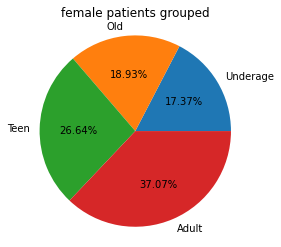

In [72]:
#visualizing # number of female according to the age_groups
labels = ['Underage','Old', 'Teen','Adult']
value=female.groupby('Age_groups')['Numeric_show'].count().sort_values()
plt.title('female patients grouped')
pie, rtf= pie_plot(value,labels);
rtf

**Number of female that turnout in accordance to age group**

Numeric_show
Age_groups Numeric_show              
Underage   0                     9434
           1                     2743
Teen       0                    14210
           1                     4466
Adult      0                    21001
           1                     4990
Old        0                    11198
           1                     2076

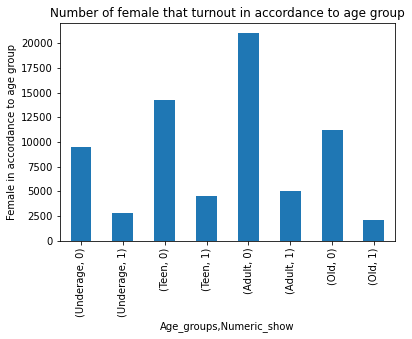

In [73]:
# visualization of Number of female that turnout in accordance to age group
plt.title('Number of female that turnout in accordance to age group')
plt.xlabel('Number of patients');
plt.ylabel('Female in accordance to age group');
data=female.groupby('Age_groups')['Numeric_show'].value_counts()
bar, rtf =bar_equation(data);
rtf

In [74]:
#female that show up in accordance to the age groups
female_show_group=female.Age_groups[df['Numeric_show']==1].value_counts()
female_show_group.sort_values()

Old         2076
Underage    2743
Teen        4466
Adult       4990
Name: Age_groups, dtype: int64

In [75]:
#mean of female that show up in accordance to the number of female grouped.
#comparison with the female present
female.groupby('Age_groups')['Numeric_show'].mean().sort_values()

Age_groups
Old         0.156396
Adult       0.191990
Underage    0.225261
Teen        0.239130
Name: Numeric_show, dtype: float64

Age_groups
Adult       0.349562
Teen        0.312855
Underage    0.192154
Old         0.145429

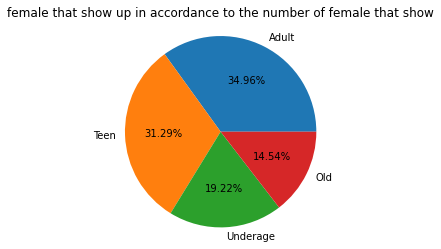

In [76]:
#Visualization of mean for female that show up in accordance to the number of female that show
value = (female_show_group/female.Age_groups[df['Numeric_show']==1].count())
labels = ['Adult','Teen','Underage','Old']
plt.title('female that show up in accordance to the number of female that show')
pie, rtf= pie_plot(value,labels);
rtf

Age_groups
Old             2076
Underage        2743
Teen            4466
Adult           4990

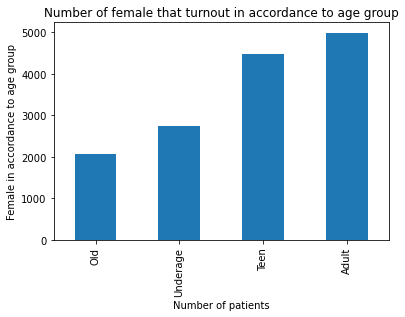

In [77]:
#visualization of Number of female that show up in accordance to age group
plt.title('Number of female that turnout in accordance to age group')
plt.xlabel('Number of patients');
plt.ylabel('Female in accordance to age group');
data=female_show_group.sort_values()
bar, rtf =bar_equation(data);
rtf

In accordance to the number of female show, most of the females that show up for appointment are adults (4,990) followed by teens females (4,466) then underage females (2,743). The Old females show up for their appointment the least (2,076).<br> 
The mean of female age group show based on the number of female that show, mojority of the females that show up for appointment are adults (0.35) followed by teens females (0.31) then underage females (0.19). The Old females show up for their appointment the least (0.15).<br>
For the mean show of female in relation to the number of female, mojority of the females that show up for appointment are teen (0.24) followed by underage females  (0.23) then adult females (0.19). The Old females show up for their appointment the least (0.16).

**What is the Number of male that turnout in accordance to age group?**<br>
Number of male in accordance to age group

Numeric_show
Age_groups              
Old                 6488
Teen                6948
Underage           11663
Adult              11770

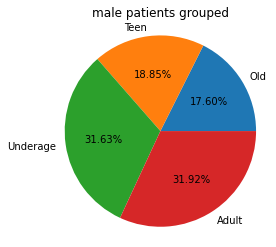

In [78]:
#visualizing # number of male according to the age_groups
male=df.query('Gender == "M"')
labels = ['Old','Teen','Underage','Adult']
plt.title('male patients grouped');
value = male.groupby('Age_groups')['Numeric_show'].count().sort_values()
pie, rtf= pie_plot(value,labels);
rtf

Numeric_show
Age_groups Numeric_show              
Underage   0                     9048
           1                     2615
Teen       0                     5311
           1                     1637
Adult      0                     9547
           1                     2223
Old        0                     5558
           1                      930

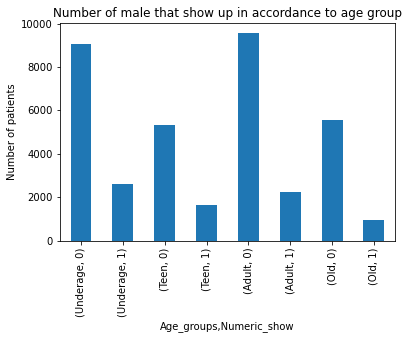

In [79]:
# visualization of Number of male that turnout in accordance to age group
plt.title('Number of male that show up in accordance to age group')
plt.ylabel('Number of patients');
plt.xlabel('Male in accordance to age group');
data = male.groupby('Age_groups')['Numeric_show'].value_counts()
bar, rtf =bar_equation(data);
rtf

In [80]:
#male that show up in accordance to the number of male
male_show_group=male.Age_groups[df['Numeric_show']==1].value_counts()
male_show_group.sort_values()

Old          930
Teen        1637
Adult       2223
Underage    2615
Name: Age_groups, dtype: int64

In [81]:
#mean of male that show up in accordance to the number of male grouped.
#comparison with the male present
male.groupby('Age_groups')['Numeric_show'].mean().sort_values()

Age_groups
Old         0.143342
Adult       0.188870
Underage    0.224213
Teen        0.235607
Name: Numeric_show, dtype: float64

Age_groups
Underage    0.353140
Adult       0.300203
Teen        0.221067
Old         0.125591

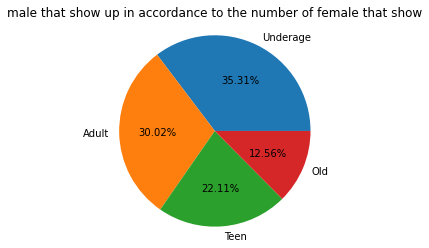

In [82]:
#Visualization of mean for male that show up in accordance to the number of male that show
value = (male_show_group/male.Age_groups[df['Numeric_show']==1].count())
labels = ['Underage','Adult','Teen','Old']
plt.title('male that show up in accordance to the number of female that show')
pie, rtf= pie_plot(value,labels);
rtf

Age_groups
Old              930
Teen            1637
Adult           2223
Underage        2615

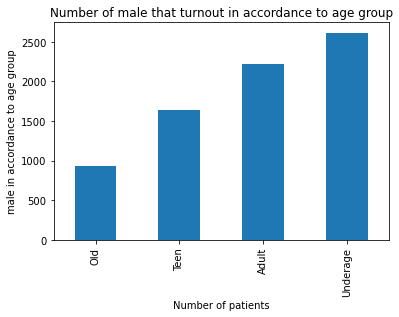

In [83]:
#visualization of Number of male that show up in accordance to age group
plt.title('Number of male that turnout in accordance to age group')
plt.xlabel('Number of patients');
plt.ylabel('male in accordance to age group');
data = male_show_group.sort_values()
bar, rtf =bar_equation(data);
rtf

In accordance to the number of male show, most of the males that show up for appointment are underage (2,615) followed by adults males (2,223) then teens males (1,637). The Old males show up for their appointment the least (930).<br> 
The mean of male age group show based on the number of male that show, have the mojority of the males show up for appointment as underage (0.35) followed by adults males (0.30) then teens males (0.22).The Old males show up for their appointment the least (0.13).<br>
For the mean show of male in relation to the number of male, mojority of the males that show up for appointment are teen (0.24) followed by underage males (0.22) then adult males (0.19). The Old males show up for their appointment the least (0.14).

In [84]:
# Ensuring the number of female that show up and male that show up add-up to number of patient that show up in the data
df_show_age == female_show_group+male_show_group

Age_groups
Underage    True
Teen        True
Adult       True
Old         True
dtype: bool

#### What's the relation of age to student with scholarship?

Age_groups
Adult           3881
Teen            3380
Underage        3010
Old              538

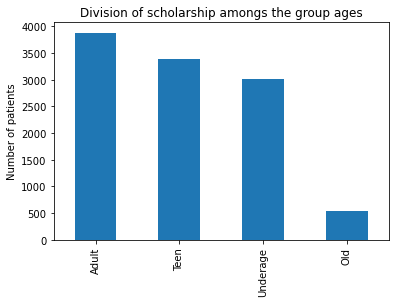

In [85]:
#Visualization of the patient with scholarship in terms of Age
plt.title('Division of scholarship amongs the group ages')
plt.ylabel('Number of patients');
data = df.Age_groups[df['Scholarship']==1].value_counts()
bar, rtf =bar_equation(data);
rtf

In [86]:
#Division of scholarship show amongs the group ages
scholarship_age_group=df_show.Age_groups[df['Scholarship']==1].value_counts()
scholarship_age_group/df.Age_groups[df['Scholarship']==1].value_counts()

Underage    0.244186
Teen        0.261243
Adult       0.223911
Old         0.156134
Name: Age_groups, dtype: float64

Age_groups
Teen             883
Adult            869
Underage         735
Old               84

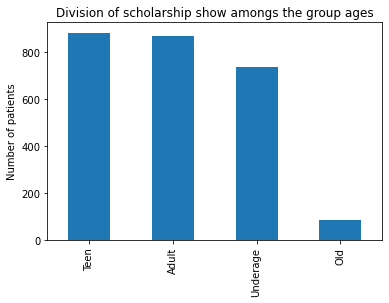

In [87]:
#Visualization of the patient with scholarship show in terms of Age
plt.title('Division of scholarship show amongs the group ages')
plt.ylabel('Number of patients');
data = scholarship_age_group
bar, rtf =bar_equation(data);
rtf

Most of the patients with scholarship are in their Teen, Adult and Underage age; 883, 869, 735 patients respectively. While the Old have the least number of patients with scholarship; 84 patients.

#### What's the relation of age to student with no scholarship show up?

In [88]:
# total number of student with no scholarship show up
noscholarship_age_group=df_show.Age_groups[df['Scholarship']==0]
noscholarship_age_group.count()

19109

In [89]:
#student with no scholarship show up divided in age groups
noscholarship_age_group.value_counts()

Adult       6344
Teen        5220
Underage    4623
Old         2922
Name: Age_groups, dtype: int64

In [90]:
#mean of student with no scholarship show up
noscholarship_age_group.value_counts()/noscholarship_age_group.count()

Adult       0.331990
Teen        0.273170
Underage    0.241928
Old         0.152912
Name: Age_groups, dtype: float64

Age_groups
Adult           6344
Teen            5220
Underage        4623
Old             2922

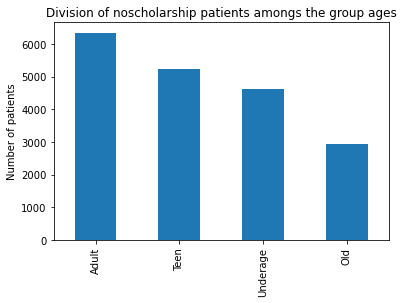

In [91]:
#Visualization of the patient with no scholarship in terms of Age
plt.title('Division of noscholarship patients amongs the group ages')
plt.ylabel('Number of patients');
data = noscholarship_age_group.value_counts()
bar, rtf =bar_equation(data);
rtf

Out of 96,178 patients without scholarships, 19,109 Patients show up for the appointment. Majority of them are Adult (0.33) followed by teens (0.27) and underage (0.24). The Old are the least in numbers with only 0.15.

#### What's the relation Gender  to student with scholarship?

In [92]:
scholarship_Gender=df_show.Gender[df['Scholarship']==1]
scholarship_Gender.value_counts()

F    2103
M     468
Name: Gender, dtype: int64

Out of the 2,571 students with scholarship, 468 are male while 2,103 are female

<a id='conclusions'></a>
## Conclusions
The dataset collected from medical appointments in Brazil consists of 110, 527 patients described in 14 columns. In accordance to the investination of the dataset, the question to be handle only requires four columns; Age, Gender, No show and Scholarship. However, two new columns were added one to represent the no_show in a numerical format and the other to group the data in accordance to the age groups. The rest of the columns were dropped leaving the dataset to have 6 columns to be analysed. There is no missing or duplicated data during the investigation hence, no replace or dropping was done in regards to the any data missing or duplicated.<br>
After review of the data, the patients with negative and zero ages value were removed as having a negative age or zero age for patient is unrealistic causing a reduction of the number patients to 106,987. The column with the No-show was renamed from No-show to No_show for easy extraction of data.<br>
The dataset comprises of 21,680 patients(20.26%) that show up and 85,307 patients(79.74%).<br>
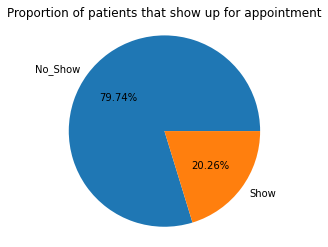<br>
From the dataset, there are 70,118 female (65.54%) and 36,869 male (34.46%) hence there are more female than Men by 33,249. As compared to men, woman takes way more care of they health better. A greater portion of the females and male don't show up for the appointment; only 20.36% of the 70,118 total number of female show up for the appointment while 79.64% don't show up for the appointment.<br>
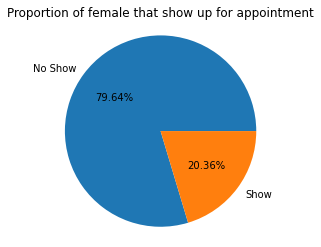
<br>This is the same for men as only 20.08% out of 36,869 men show up for the appointment while, 79.92% don't show up for the appointment.<br>
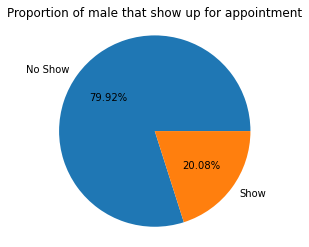
<br>In relation to the numbers of female and males, women show up for their appointment more than men with 6870 female show up for their appointment than men.<br>
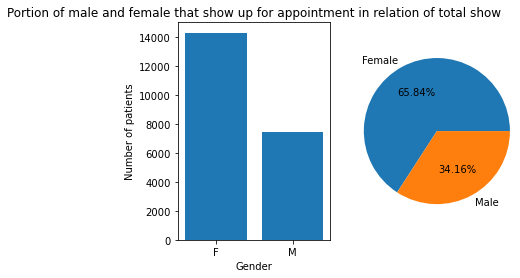
<br>In contrast to the mean, female show up for their appointment more than men with approximately 0.0027, which accounts for 59 patient, more female show up than men.<br>
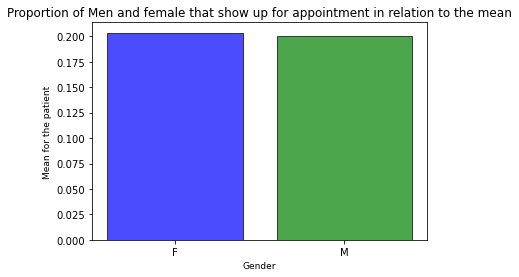
<br>In accordance to age groups, most of the females are in there adluthood (37%),followed by teen females (27%) and old females (19%) while the underage make up the least number of females (17%)<br> 
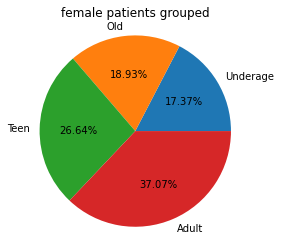
<br>- Out of the 25,991 adult females only 0.19 show up for appointment. This account for 35% of the total female show.<br>- Out of the 18,676 teen females only 0.24 show up for appointment. This account for 31% of the total female show.
<br>- Out of the 13,274 old females only 0.15 show up for appointment. This account for 15% of the total female show
<br>- Out of the underage females only 0.23 show up for appointment. This account for 19% of the total female show
<br>
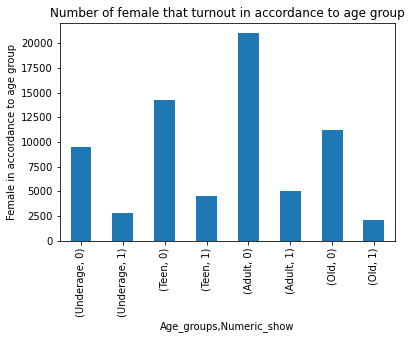
<br>In accordance to age groups, most of the males are in there adluthood (31.9%), followed by underage males (31.6%) and teen males (18.9%) while the old make up the least number of males (17.6%)<br> 
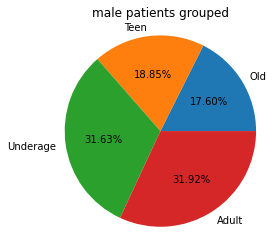
<br>- Out of the 11,770 adult males only 0.19 show up for appointment. This account for 30% of the total male show.<br>- Out of the 6,948 teen males only 0.24 show up for appointment. This account for 22% of the total male show.
<br>- Out of the 6,488 old males only 0.14 show up for appointment. This account for 13% of the total male show
<br>- Out of the underage males only 0.22 show up for appointment. This account for 35% of the total male show
<br>
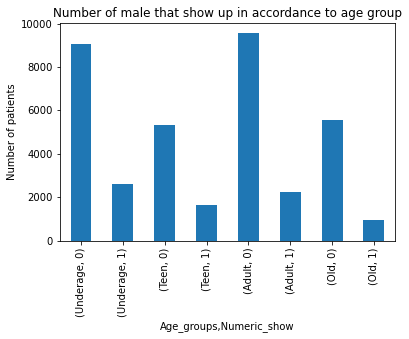
<br>From the dataset, 10,809 patients benefit from the *Bolsa Família* financial aid with accounts for 10.10% of the total patients. The number of students that adhere to the scholarships terms by showing up for the appointment is 2,571 which approximately 23.79% of the total number of patients with scholarship.<br>
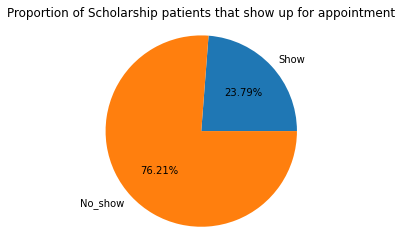
<br>Compared to the number of patients without scholarship, those with scholarship show up more for appointment; only 19.86% of patients without scholarship show for appointment.
<br>
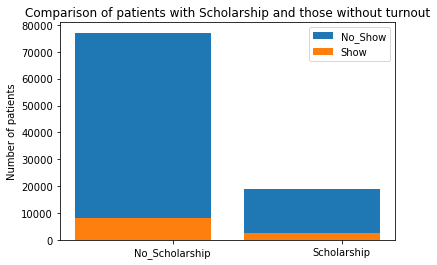
<br>Patients with scholarship consists mostly of Young generations; Adult, teen and underage student while a few are Old.
<br>- Out of the 3,881 adult patients with scholarship only 0.22 show up for appointment.
<br>- Out of the 3,380 teen patients with scholarship only 0.22 show up for appointment.
<br>- Out of the 538 old patients with scholarship only 0.15 show up for appointment.
<br>- Out of the 3,010 underage patients with scholarship only 0.24 show up for appointment.
<br>Out of the 2,571 students with scholarship, 468 are male while 2,103 are female
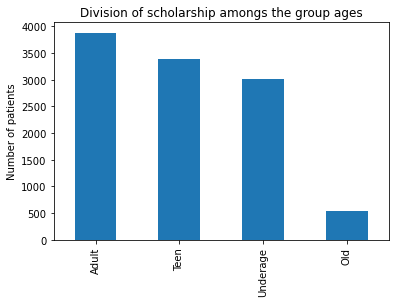
<br>
<br>Most of the patients in the data set are in their Adult age (35%) while the Underage and teen typically makes appointments; 22% and 24% respeactively. The old make appointments the least with 18%  patients. Most of the patient that show up for the appointment are Young; Teens(0.238) and underage(0.224) while the adults and old show up the least; Adults (0.19) and Old (0.15).<br>
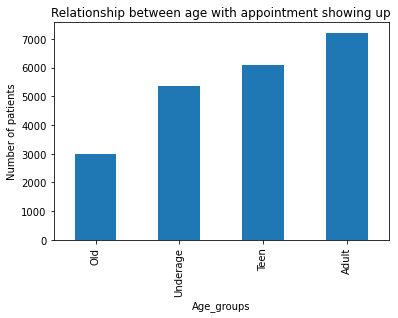
**Limitation of the analysis**
<br>During the analysis, data containing zero and negative values was drop as the values were unrealistic. This involve the removal of 3,539 rows. The rows contained other important data thus a better way should be recommended instead of the drop method.
<br> A standard way of grouping the data in accordance to ages in stead of 0.00 - 17.0,18.0- 35.0, 36.0 - 60.0, 61.0 - 115.0]. Although the method gives results for different groups, it may vary from different places.
<br> Further analysis of patients show up for appointment in relation to the PatientId, AppointmentID, ScheduledDay, AppointmentDay, Neighbourhood, Hipertension, Diabetes, Alcoholism, Handcap	and SMS_received should be done.


**Resources Used**<br>
[Medical Appointment No Shows](https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv)<br>
[Grouped Bar Charts with Labels in Matplotlib](https://www.pythoncharts.com/matplotlib/grouped-bar-charts-matplotlib/)<br>
[More advanced plotting with Pandas Matplotlib](https://geo-python.github.io/site/notebooks/L7/advanced-plotting.html)